### Hodge Decomposition

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import read_csv, get_coordinates, SCPlot


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_91771/1781286838.py:6: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  scplot.draw_network(edge_flow=synthetic_flow, ax=ax)


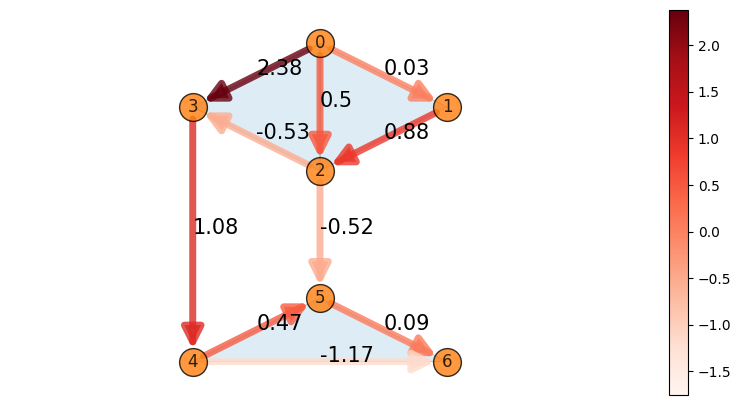

In [3]:
# intial flow f
fig = plt.figure(figsize = (10,5))
synthetic_flow = np.array([0.03, 0.5, 2.38, 0.88, -0.53, -0.52, 1.08, 0.47, -1.17, 0.09])

ax = fig.add_subplot(1, 1, 1)
scplot.draw_network(edge_flow=synthetic_flow, ax=ax)

In [4]:
from sclibrary.utils.hodgedecomposition import get_divergence
# divergence
B1 = sc.incidence_matrix(rank=1)
get_divergence(B1, synthetic_flow)

array([-2.91, -0.85,  2.43,  0.77,  1.78, -0.14, -1.08])

In [5]:
f_h, f_c, f_g = sc.get_hodgedecomposition(flow=synthetic_flow)
# gradient component
print("Gradient component: ", f_g)
# curl component
print("Curl component: ", f_c)
# harmonic component
print("Harmonic component: ", f_h)

Gradient component:  [ 0.25  1.34  1.32  1.1  -0.02  0.03  0.53 -0.47 -0.78 -0.3 ]
Curl component:  [-0.15 -0.7   0.85 -0.15 -0.85  0.    0.    0.58 -0.58  0.58]
Harmonic component:  [-0.07 -0.14  0.21 -0.07  0.34 -0.55  0.55  0.37  0.18 -0.18]


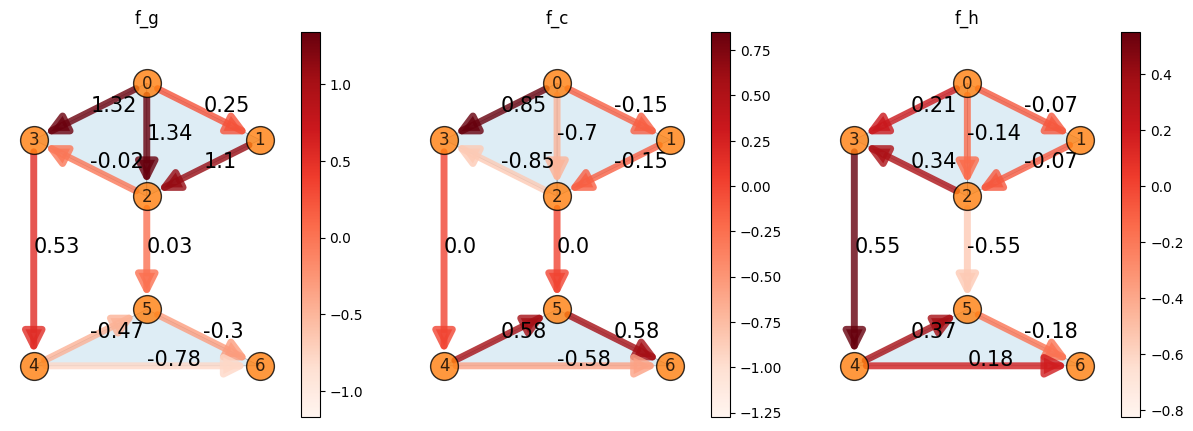

In [6]:
# plot the hodge decomposition
scplot.draw_hodge_decomposition(synthetic_flow)

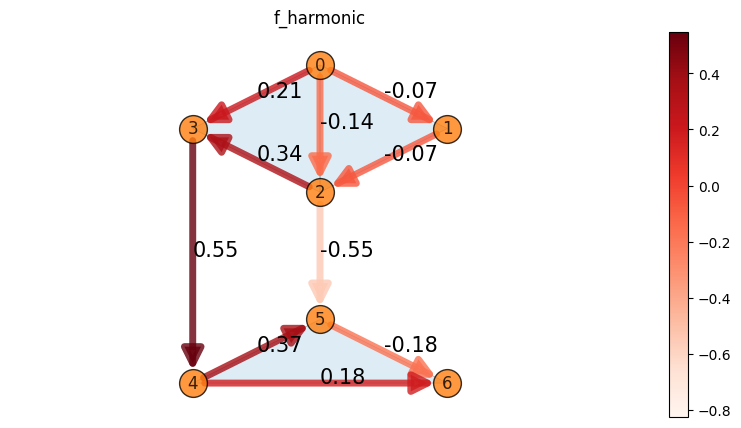

In [7]:
# plot only the gradient component
# set figsize
figsize = (10, 5)
scplot.draw_hodge_decomposition(synthetic_flow, component="harmonic", figsize=figsize)